# Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/PINN

/content/drive/.shortcut-targets-by-id/1kBpsdlzoY9Dl5Og9N1a-GxSNoIkIrQV4/PINN


In [3]:
!ls -l

total 3300
drwx------ 2 root root    4096 Feb 28 00:23  ar_377_2011-02-12T00:00:00a
drwx------ 2 root root    4096 Feb  6 01:28  AR_377_series
drwx------ 2 root root    4096 Feb 27 07:32  ar_7115_2017-09-06T08:36:00
drwx------ 2 root root    4096 Feb  6 07:56  AR_7115_series
drwx------ 2 root root    4096 Feb 28 00:23  ar_series_377_2011-02-12T00:00:00a
drwx------ 2 root root    4096 Feb  7 23:25  ar_series_7115_2017-09-06T08:36:00
drwx------ 2 root root    4096 Feb 22 23:19  author
-rw------- 1 root root  578618 Feb 28 00:23 'extrapolation AR377.ipynb'
-rw------- 1 root root  723048 Feb 27 07:32 'extrapolation AR7115.ipynb'
-rw------- 1 root root 1005539 Feb 28 00:23  extrapolation_custom.ipynb
-rw------- 1 root root   56254 Feb 27 07:31  hmi_cropped_binning.png
-rw------- 1 root root   56881 Feb 27 07:31  hmi_cropped.png
-rw------- 1 root root   56881 Feb 27 07:31  hmi_original.png
-rw------- 1 root root   17351 Feb 27 01:53  nf2_to_info.ipynb
-rw------- 1 root root  853125 Feb 26 23

In [4]:
!pip install -q git+https://github.com/RobertJaro/NF2.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 60.7 MB/s eta 0:00:00


In [5]:
# general imports
import glob
import os
from datetime import datetime
from dateutil.parser import parse
import shutil

# download
import drms
from urllib import request

# data processing
import numpy as np
from astropy.nddata import block_reduce
from sunpy.map import Map

# deep learning
import torch

# NF2
from nf2.train.trainer import NF2Trainer
from nf2.data.download import download_HARP, find_HARP, donwload_ds
from nf2.train.metric import *
from nf2.evaluation.unpack import load_cube
from nf2.evaluation.energy import get_free_mag_energy
from nf2.data.loader import load_hmi_data
from nf2.train.metric import energy

# visualization
from matplotlib import pyplot as plt

# Path
from pathlib import Path

# Parameters for NOAA 11158 / HARPNUM 377

In [12]:
jsoc_email = 'mgjeon@khu.ac.kr'
client = drms.Client(email=jsoc_email, verbose=True)

noaa_nums = [11158]
year = 2011
month = 2
day = 12
hour = 0
minute = 0

date = datetime(year, month, day, hour, minute)

sharp_nr = find_HARP(date, noaa_nums, client)
print(sharp_nr)
download_dir = 'AR_377'

377


In [13]:
bin = 2
spatial_norm = 160 
height = 160 
b_norm = 2500  
d_slice = [66, 658, 9, 377] # crop

dim = 256

lambda_div = 0.1 
lambda_ff = 0.1 
iterations = 10e4 
iterations = int(iterations)
decay_iterations = 5e4 
decay_iterations = int(decay_iterations)
batch_size = 1e4 
batch_size = int(batch_size)
log_interval = 1e4 
log_interval = int(log_interval)
validation_interval = 1e4 
validation_interval = int(validation_interval)
potential = True

In [14]:
base_path = './ar_%d_%s' % (sharp_nr, date.isoformat('T'))
series_base_path = './ar_series_%d_%s' % (sharp_nr, date.isoformat('T'))
series_download_dir = './AR_377_series'
bpp = os.path.join(series_base_path, 'base')

In [15]:
os.makedirs(base_path, exist_ok=True)
os.makedirs(series_base_path, exist_ok=True)
os.makedirs(bpp, exist_ok=True)
os.makedirs(series_download_dir, exist_ok=True)

In [16]:
duration = '120h'

In [17]:
new_meta_path = './ar_377_2011-02-12T00:00:00/extrapolation_result.nf2'

# Parameters for NOAA 12673 / HARPNUM 7115

In [ ]:
jsoc_email = 'mgjeon@khu.ac.kr'
client = drms.Client(email=jsoc_email, verbose=True)

noaa_nums = [12673]
year = 2017
month = 9
day = 6
hour = 8
minute = 36

date = datetime(year, month, day, hour, minute)

sharp_nr = find_HARP(date, noaa_nums, client)
print(sharp_nr)
download_dir = 'AR_7115'

7115


In [ ]:
bin = 2
spatial_norm = 160 
height = 160 
b_norm = 2500  
d_slice = None

dim = 256

lambda_div = 0.1 
lambda_ff = 0.1 
iterations = 10e4 
iterations = int(iterations)
decay_iterations = 5e4 
decay_iterations = int(decay_iterations)
batch_size = 1e4 
batch_size = int(batch_size)
log_interval = 1e4 
log_interval = int(log_interval)
validation_interval = 1e4 
validation_interval = int(validation_interval)
potential = True

In [ ]:
base_path = './ar_%d_%s' % (sharp_nr, date.isoformat('T'))
series_base_path = './ar_series_%d_%s' % (sharp_nr, date.isoformat('T'))
series_download_dir = './AR_7115_series'
bpp = os.path.join(series_base_path, 'base')

In [ ]:
os.makedirs(base_path, exist_ok=True)
os.makedirs(series_base_path, exist_ok=True)
os.makedirs(bpp, exist_ok=True)
os.makedirs(series_download_dir, exist_ok=True)

In [ ]:
duration = '4h'

In [ ]:
new_meta_path = './ar_7115_2017-09-06T08:36:00/extrapolation_result.nf2'

# Download HMI FITS

In [ ]:
ds = 'hmi.sharp_cea_720s[%d][%s/%s]{Br, Bp, Bt, Br_err, Bp_err, Bt_err}' % \
     (sharp_nr, date.isoformat('_', timespec='seconds'), duration)
donwload_ds(ds, series_download_dir, client)

Streaming output truncated to the last 5000 lines.
    record: hmi.sharp_cea_720s[377][2011.02.15_06:12:00_TAI]
  filename: hmi.sharp_cea_720s.377.20110215_061200_TAI.Bt_err.fits
  -> AR_377_series/hmi.sharp_cea_720s.377.20110215_061200_TAI.Bt_err.fits
    record: hmi.sharp_cea_720s[377][2011.02.15_06:12:00_TAI]
  filename: hmi.sharp_cea_720s.377.20110215_061200_TAI.Br_err.fits
  -> AR_377_series/hmi.sharp_cea_720s.377.20110215_061200_TAI.Br_err.fits
    record: hmi.sharp_cea_720s[377][2011.02.15_06:24:00_TAI]
  filename: hmi.sharp_cea_720s.377.20110215_062400_TAI.Bp.fits
  -> AR_377_series/hmi.sharp_cea_720s.377.20110215_062400_TAI.Bp.fits
    record: hmi.sharp_cea_720s[377][2011.02.15_06:24:00_TAI]
  filename: hmi.sharp_cea_720s.377.20110215_062400_TAI.Bt.fits
  -> AR_377_series/hmi.sharp_cea_720s.377.20110215_062400_TAI.Bt.fits
    record: hmi.sharp_cea_720s[377][2011.02.15_06:24:00_TAI]
  filename: hmi.sharp_cea_720s.377.20110215_062400_TAI.Br.fits
  -> AR_377_series/hmi.sharp_cea_

,record,url,download
0,hmi.sharp_cea_720s[377][2011.02.12_00:00:00_TAI],http://jsoc.stanford.edu/SUM66/D1606751764/S00...,/content/drive/MyDrive/PINN/AR_377_series/hmi....
1,hmi.sharp_cea_720s[377][2011.02.12_00:00:00_TAI],http://jsoc.stanford.edu/SUM66/D1606751764/S00...,/content/drive/MyDrive/PINN/AR_377_series/hmi....
2,hmi.sharp_cea_720s[377][2011.02.12_00:00:00_TAI],http://jsoc.stanford.edu/SUM66/D1606751764/S00...,/content/drive/MyDrive/PINN/AR_377_series/hmi....
3,hmi.sharp_cea_720s[377][2011.02.12_00:00:00_TAI],http://jsoc.stanford.edu/SUM66/D1606751764/S00...,/content/drive/MyDrive/PINN/AR_377_series/hmi....
4,hmi.sharp_cea_720s[377][2011.02.12_00:00:00_TAI],http://jsoc.stanford.edu/SUM66/D1606751764/S00...,/content/drive/MyDrive/PINN/AR_377_series/hmi....
...,...,...,...
3595,hmi.sharp_cea_720s[377][2011.02.16_23:48:00_TAI],http://jsoc.stanford.edu/SUM66/D1606751764/S00...,/content/drive/MyDrive/PINN/AR_377_series/hmi....
3596,hmi.sharp_cea_720s[377][2011.02.16_23:48:00_TAI],http://jsoc.stanford.edu/SUM66/D1606751764/S00...,/content/drive/MyDrive/PINN/AR_377_series/hmi....
3597,hmi.sharp_cea_720s[377][2011.02.16_23:48:00_TAI],http://jsoc.stanford.edu/SUM66/D1606751764/S00...,/content/drive/MyDrive/PINN/AR_377_series/hmi....
3598,hmi.sharp_cea_720s[377][2011.02.16_23:48:00_TAI],http://jsoc.stanford.edu/SUM66/D1606751764/S00...,/content/drive/MyDrive/PINN/AR_377_series/hmi....


# Prepare Data

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards.


(744, 377, 3)
True
True
True


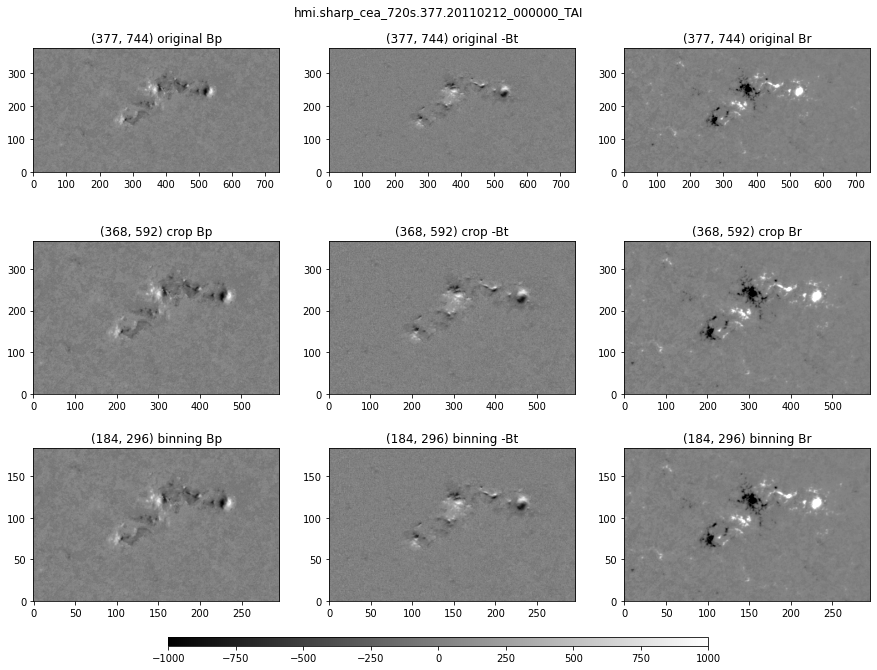

In [18]:
# scan all data files
hmi_p_files = sorted(glob.glob(os.path.join(series_download_dir, '*Bp.fits')))  # x
hmi_t_files = sorted(glob.glob(os.path.join(series_download_dir, '*Bt.fits')))  # y
hmi_r_files = sorted(glob.glob(os.path.join(series_download_dir, '*Br.fits')))  # z
err_p_files = sorted(glob.glob(os.path.join(series_download_dir, '*Bp_err.fits')))  # x
err_t_files = sorted(glob.glob(os.path.join(series_download_dir, '*Bt_err.fits')))  # y
err_r_files = sorted(glob.glob(os.path.join(series_download_dir, '*Br_err.fits')))  # z

hmi_p = hmi_p_files[0]
hmi_t = hmi_t_files[0]
hmi_r = hmi_r_files[0]
err_p = err_p_files[0]
err_t = err_t_files[0]
err_r = err_r_files[0]

hmi_cube, error_cube, meta_info = load_hmi_data([hmi_p, err_p, hmi_r, err_r, hmi_t, err_t])
print(hmi_cube.shape)
# print(np.shape(np.transpose(Map(hmi_p).data)))
print(np.array_equal(hmi_cube[..., 0], np.transpose(Map(hmi_p).data)))
print(np.array_equal(hmi_cube[..., 1], np.transpose(-Map(hmi_t).data)))
print(np.array_equal(hmi_cube[..., 2], np.transpose(Map(hmi_r).data)))

vmin = -1000
vmax = 1000

fig, axes = plt.subplots(3,3, figsize=(15,12))
im = axes[0,0].imshow(hmi_cube[..., 0].transpose(), origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[0,0].set_title(f'{hmi_cube[..., 0].transpose().shape} original Bp')
axes[0,1].imshow(hmi_cube[..., 1].transpose(), origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[0,1].set_title(f'{hmi_cube[..., 1].transpose().shape} original -Bt')
axes[0,2].imshow(hmi_cube[..., 2].transpose(), origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[0,2].set_title(f'{hmi_cube[..., 2].transpose().shape} original Br')

if d_slice is not None:
  hmi_cube = hmi_cube[d_slice[0]:d_slice[1], d_slice[2]:d_slice[3]]
  error_cube = error_cube[d_slice[0]:d_slice[1], d_slice[2]:d_slice[3]]

axes[1,0].imshow(hmi_cube[..., 0].transpose(), origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[1,0].set_title(f'{hmi_cube[..., 0].transpose().shape} crop Bp')
axes[1,1].imshow(hmi_cube[..., 1].transpose(), origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[1,1].set_title(f'{hmi_cube[..., 1].transpose().shape} crop -Bt')
axes[1,2].imshow(hmi_cube[..., 2].transpose(), origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[1,2].set_title(f'{hmi_cube[..., 2].transpose().shape} crop Br')

if bin > 1:
  hmi_cube = block_reduce(hmi_cube, (bin, bin, 1), np.mean)
  error_cube = block_reduce(error_cube, (bin, bin, 1), np.mean)

axes[2,0].imshow(hmi_cube[..., 0].transpose(), origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[2,0].set_title(f'{hmi_cube[..., 0].transpose().shape} binning Bp')
axes[2,1].imshow(hmi_cube[..., 1].transpose(), origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[2,1].set_title(f'{hmi_cube[..., 1].transpose().shape} binning -Bt')
axes[2,2].imshow(hmi_cube[..., 2].transpose(), origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[2,2].set_title(f'{hmi_cube[..., 2].transpose().shape} binning Br')

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.25, 0.16, 0.5, 0.01])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

fig.suptitle(t=f'{os.path.basename(hmi_p)[:-8]}', x=0.5, y=0.90)
figpath = Path(series_base_path) / 'hmi_original_crop_binning.png'
fig.savefig(figpath, dpi=300)

# Initial Training

In [19]:
trainer = NF2Trainer(base_path, hmi_cube, error_cube, height, spatial_norm, b_norm,
                     meta_info=meta_info, dim=dim,
                     use_potential_boundary=potential, lambda_div=lambda_div, lambda_ff=lambda_ff,
                     decay_iterations=decay_iterations, meta_path=None)

Configuration:
dim: 256, lambda_div: 0.100000, lambda_ff: 0.100000, decay_iterations: 50000, potential: True, vector_potential: False, 
Using device: cuda (gpus 1) ['Tesla T4']
Potential Boundary: 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


In [20]:
trainer.train(iterations, batch_size, log_interval, validation_interval, num_workers=os.cpu_count())

Training:   0%|          | 212/100000 [00:41<5:26:12,  5.10it/s]


KeyboardInterrupt: ignored

# Series Training

In [21]:
series_iterations = 2000
series_batch_size = int(1e4)
series_log_interval = 2000
series_validation_interval = -1

In [23]:
# scan all data files
hmi_p_files = sorted(glob.glob(os.path.join(series_download_dir, '*Bp.fits')))  # x
hmi_t_files = sorted(glob.glob(os.path.join(series_download_dir, '*Bt.fits')))  # y
hmi_r_files = sorted(glob.glob(os.path.join(series_download_dir, '*Br.fits')))  # z
err_p_files = sorted(glob.glob(os.path.join(series_download_dir, '*Bp_err.fits')))  # x
err_t_files = sorted(glob.glob(os.path.join(series_download_dir, '*Bt_err.fits')))  # y
err_r_files = sorted(glob.glob(os.path.join(series_download_dir, '*Br_err.fits')))  # z

for hmi_p, hmi_t, hmi_r, err_p, err_t, err_r in zip(hmi_p_files, hmi_t_files, hmi_r_files,
                                                    err_p_files, err_t_files, err_r_files):
    file_id = os.path.basename(hmi_p).split('.')[3]
    bp = os.path.join(bpp, file_id)

    # check if finished
    final_model_path = os.path.join(bp, 'final.pt')
    print(final_model_path)
    #print(os.path.exists(final_model_path))
    if os.path.exists(final_model_path):
        new_meta_path = final_model_path
        continue
    
    # data pre-processing; same as for the single extrapolation
    hmi_cube, error_cube, meta_info = load_hmi_data([hmi_p, err_p, hmi_r, err_r, hmi_t, err_t])
    
    if d_slice is not None:
      hmi_cube = hmi_cube[d_slice[0]:d_slice[1], d_slice[2]:d_slice[3]]
      error_cube = error_cube[d_slice[0]:d_slice[1], d_slice[2]:d_slice[3]]
    if bin > 1:
      hmi_cube = block_reduce(hmi_cube, (bin, bin, 1), np.mean)
      error_cube = block_reduce(error_cube, (bin, bin, 1), np.mean)
    print(hmi_cube.shape)
    trainer = NF2Trainer(bp, hmi_cube, error_cube, height, spatial_norm, b_norm, 
                         meta_info=meta_info, dim=dim, 
                         lambda_div=lambda_div, lambda_ff=lambda_ff,
                         meta_path=new_meta_path, use_potential_boundary=potential)
    trainer.train(series_iterations, series_batch_size, 
                  series_log_interval, series_validation_interval)
    new_meta_path = final_model_path

./ar_series_377_2011-02-12T00:00:00/base/20110212_000000_TAI/final.pt


Configuration:
dim: 256, lambda_div: 0.100000, lambda_ff: 0.100000, decay_iterations: None, potential: True, vector_potential: False, 
Using device: cuda (gpus 1) ['Tesla T4']


(296, 184, 3)


Potential Boundary: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]
Loaded meta state: ./ar_377_2011-02-12T00:00:00/extrapolation_result.nf2
Training:   7%|▋         | 142/2000 [00:28<06:11,  5.00it/s]


KeyboardInterrupt: ignored

In [ ]:
nf2_paths = sorted(glob.glob(os.path.join(bpp, '**', 'extrapolation_result.nf2')))

# save results as npy files
eval_magnetic_field_path = os.path.join(series_base_path, 'eval_magnetic_field')
os.makedirs(eval_magnetic_field_path, exist_ok=True)
magnetic_field_files = []
for path in nf2_paths:
  print(path)
  f = os.path.join(eval_magnetic_field_path, '%s.npy' % path.split('/')[-2])
  if os.path.exists(f): 
    magnetic_field_files += [f]
    continue
  b = load_cube(path, progress=True)
  np.save(f, b)
  magnetic_field_files += [f]

series_dates = [datetime.strptime(os.path.basename(f), '%Y%m%d_%H%M%S_TAI.npy') for f in magnetic_field_files]

In [ ]:
#state = torch.load('./ar_series_377_2011-02-12T00:00:00/base/20110212_080000_TAI/final.pt')
#state

In [ ]:
eval_energy_path = os.path.join(series_base_path, 'eval_energy')
os.makedirs(eval_energy_path, exist_ok=True)
energy_files = []

for path in magnetic_field_files:
  f = os.path.join(eval_energy_path, os.path.basename(path))
  if os.path.exists(f): 
    energy_files += [f]
    continue
  b = np.load(path)
  me = energy(b)
  np.save(f, me)
  energy_files += [f]

energy_series_dates = [datetime.strptime(os.path.basename(f), '%Y%m%d_%H%M%S_TAI.npy') for f in energy_files]

In [ ]:
cm_per_pixel = 360e5 * bin
dV = cm_per_pixel**3

plt.figure(figsize=(9, 3))
plt.plot(energy_series_dates, [np.load(f).sum()*dV for f in energy_files])
plt.title('AR 377')
plt.ylabel('total magnetic energy')
figure_energy_path = os.path.join(series_base_path, './energy.png')
plt.savefig(figure_energy_path, dpi=300)
plt.show()

In [ ]:
eval_free_energy_path = os.path.join(series_base_path, 'eval_free_energy')
os.makedirs(eval_free_energy_path, exist_ok=True)
free_energy_files = []

for path in magnetic_field_files:
  f = os.path.join(eval_free_energy_path, os.path.basename(path))
  if os.path.exists(f): 
    free_energy_files += [f]
    continue
  b = np.load(path)
  free_me = get_free_mag_energy(b)
  np.save(f, free_me)
  free_energy_files += [f]

free_energy_series_dates = [datetime.strptime(os.path.basename(f), '%Y%m%d_%H%M%S_TAI.npy') for f in free_energy_files]

In [ ]:
cm_per_pixel = 360e5 * bin
dV = cm_per_pixel**3

plt.figure(figsize=(9, 3))
plt.plot(free_energy_series_dates, [np.load(f).sum()*dV for f in free_energy_files])
plt.title('AR 377')
plt.ylabel('total free magnetic energy')
figure_free_energy_path = os.path.join(series_base_path, './free_energy.png')
plt.savefig(figure_free_energy_path, dpi=300)
plt.show()

# Evaluation

In [ ]:
nf2_paths = sorted(glob.glob(os.path.join(bpp, '**', 'extrapolation_result.nf2')))

## Energy

In [ ]:
eval_energy_path = os.path.join(series_base_path, 'eval_energy')
os.makedirs(eval_energy_path, exist_ok=True)
energy_files = []

for path in nf2_paths:
  print(path)
  f = os.path.join(eval_energy_path, os.path.basename(os.path.dirname(path))) + '.npy'
  print(f)
  if os.path.exists(f): 
    energy_files += [f]
    continue
  b = load_cube(path, progress=True)
  me = energy(b).sum()
  np.save(f, me)
  energy_files += [f]

energy_series_dates = [datetime.strptime(os.path.basename(f), '%Y%m%d_%H%M%S_TAI.npy') for f in energy_files]

cm_per_pixel = 360e5 * bin
dV = cm_per_pixel**3

plt.figure(figsize=(9, 3))
plt.plot(energy_series_dates, [np.load(f)*dV for f in energy_files])
plt.title(download_dir)
plt.ylabel('total magnetic energy')
figure_energy_path = os.path.join(series_base_path, './energy.png')
plt.savefig(figure_energy_path, dpi=300)
plt.show()

## Free Energy

In [ ]:
eval_free_energy_path = os.path.join(series_base_path, 'eval_free_energy')
os.makedirs(eval_free_energy_path, exist_ok=True)
free_energy_files = []

for path in nf2_paths:
  print(path)
  f = os.path.join(eval_free_energy_path, os.path.basename(os.path.dirname(path))) + '.npy'
  print(f)
  if os.path.exists(f): 
    free_energy_files += [f]
    continue
  b = load_cube(path, progress=True)
  free_me = get_free_mag_energy(b).sum()
  np.save(f, free_me)
  free_energy_files += [f]

free_energy_series_dates = [datetime.strptime(os.path.basename(f), '%Y%m%d_%H%M%S_TAI.npy') for f in free_energy_files]

cm_per_pixel = 360e5 * bin
dV = cm_per_pixel**3

plt.figure(figsize=(9, 3))
plt.plot(free_energy_series_dates, [np.load(f).sum()*dV for f in free_energy_files])
plt.title(download_dir)
plt.ylabel('total free magnetic energy')
figure_free_energy_path = os.path.join(series_base_path, './free_energy.png')
plt.savefig(figure_free_energy_path, dpi=300)
plt.show()

NameError: ignored